1. Compute -- Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Is there a correlation?
2. Compute – Do the same as above but now with Time on App and Yearly Amount Spent. Is this correlation stronger than 1st One?
3. Compute -- Explore types of relationships across the entire data set using pairplot . Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?
4. Compute – Create linear model plot of Length of Membership and Yearly Amount Spent. Does the data fits well in linear plot?
5. Compute – Train and Test the data and answer multiple questions -- What is the use of random_state=85?
6. Compute – Predict the data and do a scatter plot. Check if actual and predicted data match?
7. What is the value of Root Mean Squared Error?
8. Final Question – Based on coefficients interpret company should focus more on their mobile app or on their website

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dfcustdata = pd.read_csv("FyntraCustomerData.csv")

In [8]:
dfcustdata.shape

(500, 8)

In [9]:
dfcustdata.columns

Index(['Email', 'Address', 'Avatar', 'Avg_Session_Length', 'Time_on_App',
       'Time_on_Website', 'Length_of_Membership', 'Yearly_Amount_Spent'],
      dtype='object')

In [10]:
dfcustdata.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
dfcustdata.isna().count()

Email                   500
Address                 500
Avatar                  500
Avg_Session_Length      500
Time_on_App             500
Time_on_Website         500
Length_of_Membership    500
Yearly_Amount_Spent     500
dtype: int64

### Compute -- Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Is there a correlation?

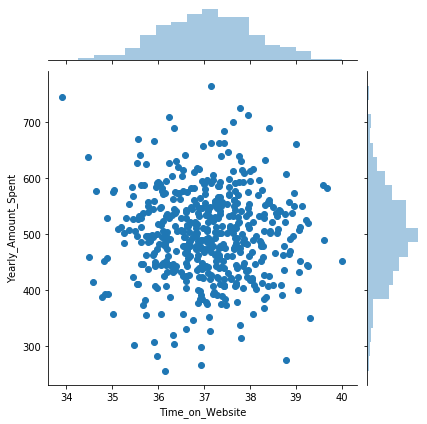

In [13]:
sns.jointplot(x='Time_on_Website', y= 'Yearly_Amount_Spent', data=dfcustdata)
plt.show()

### Compute – Do the same as above but now with Time on App and Yearly Amount Spent. Is this correlation stronger than 1st One?

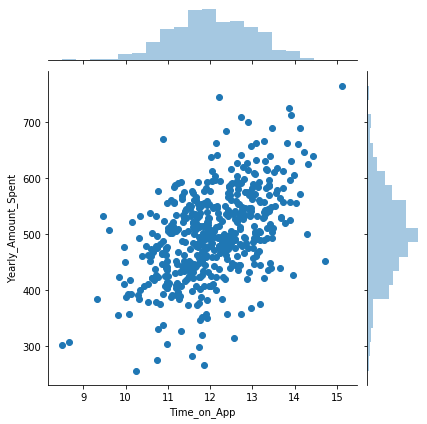

In [14]:
sns.jointplot(x='Time_on_App', y= 'Yearly_Amount_Spent', data= dfcustdata)

In [15]:
dfcustdata.corr()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
Avg_Session_Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time_on_App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time_on_Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length_of_Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly_Amount_Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


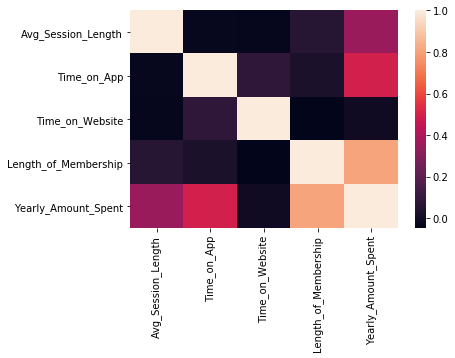

In [17]:
sns.heatmap(dfcustdata.corr())
plt.show()

### Compute -- Explore types of relationships across the entire data set using pairplot . Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?

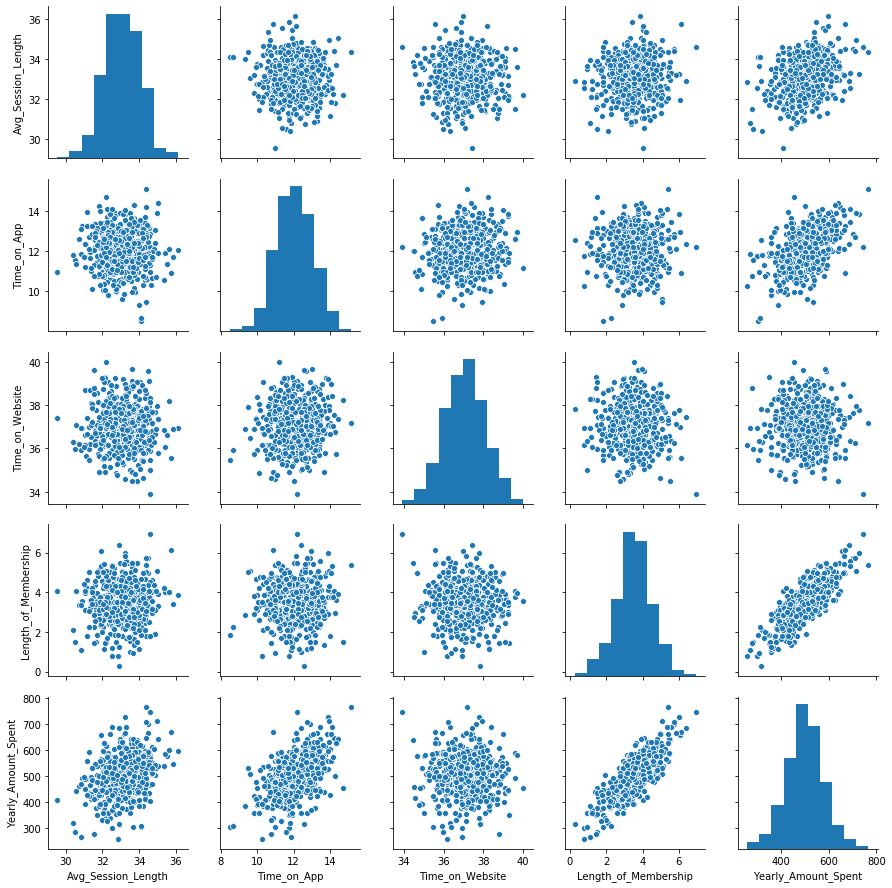

In [18]:
sns.pairplot(dfcustdata)

### Compute – Create linear model plot of Length of Membership and Yearly Amount Spent. Does the data fits well in linear plot?

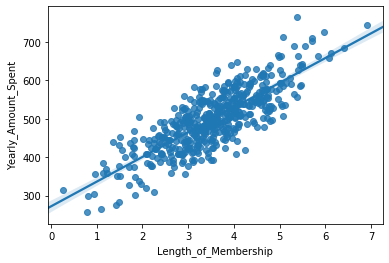

In [20]:
sns.regplot(x='Length_of_Membership',y='Yearly_Amount_Spent', data= dfcustdata)
plt.show()

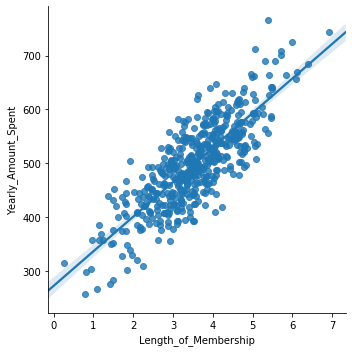

In [21]:
sns.lmplot(x='Length_of_Membership',y='Yearly_Amount_Spent', data= dfcustdata)
plt.show()

### 5. Compute – Train and Test the data and answer multiple questions -- What is the use of random_state=85?
### 6. Compute – Predict the data and do a scatter plot. Check if actual and predicted data match?
### 7. What is the value of Root Mean Squared Error?

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [32]:
dfcustdata.columns

Index(['Email', 'Address', 'Avatar', 'Avg_Session_Length', 'Time_on_App',
       'Time_on_Website', 'Length_of_Membership', 'Yearly_Amount_Spent'],
      dtype='object')

In [191]:
features = ['Length_of_Membership','Time_on_App']
X = dfcustdata[features]
y = dfcustdata.Yearly_Amount_Spent
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 85)

In [192]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [193]:
pred_y = lrm.predict(X_test)

In [194]:
from sklearn.metrics import mean_squared_error

In [195]:
mean_squared_error(y_test,pred_y)

727.3113536725041

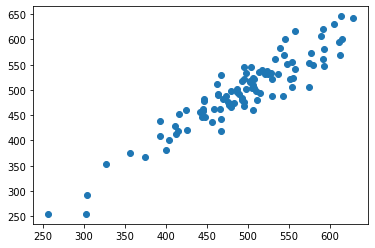

In [197]:
plt.scatter(y_test,pred_y)
plt.show()

### Final Question – Based on coefficients interpret company should focus more on their mobile app or on their website

Ans: Mobile App